## Titanic Survival Classification

This notebook outlines a procedure to classify individuals who survived/died on the titanic using machine learning models. This is my custom solution to Exercise 3 in the Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow book, Chapter 3.

### 1. Data Collection

In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
np.random.seed(42)

DATA_DIR = 'data'

def load_file(filename):
    return pd.read_csv(os.path.join(DATA_DIR, filename))

In [32]:
train_df = load_file('train.csv')
test_df = load_file('test.csv')

### 2. Data Exploration

In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
# Correlation matrix
corr_matrix = train_df.corr()

In [37]:
# Look at how each attribute correlates with Survived
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

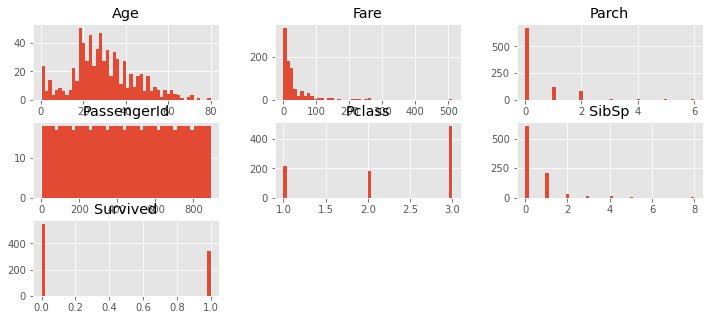

In [38]:
# Histogram
train_df.hist(bins=50, figsize=(12,5))
plt.show()

### 3. Data Preprocessing

In [39]:
# Keep labels
train_df_labels = train_df['Survived'].copy()

train_df_data = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
test_df_data = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [41]:
# Get numerical and categorical attributes
num_attribs = [i for i in train_df_data.columns if train_df_data.dtypes[i] in ['int64', 'float64']]
cat_attribs = [i for i in train_df_data.columns if train_df_data.dtypes[i] == 'object']

In [42]:
# Create pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [43]:
# Create pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat', OneHotEncoder())
])

In [44]:
# Create full pipeline for both numerical and categorical attributes
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

In [45]:
# Apply pipeline to full dataset
train_df_prepared = full_pipeline.fit_transform(train_df_data)

### 4. Model Training and Evaluation

In [46]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
lin_reg = LogisticRegression()
lin_reg.fit(train_df_prepared, train_df_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Obtain classification metrics for logistic regression trained on training set
train_predictions = lin_reg.predict(train_df_prepared)
print('Accuracy:', accuracy_score(train_predictions, train_df_labels))
print('Precision:', precision_score(train_df_labels, train_predictions))
print('Recall:', recall_score(train_df_labels, train_predictions))
print('F1 Score:', f1_score(train_df_labels, train_predictions))

Accuracy: 0.7991021324354658
Precision: 0.7570977917981072
Recall: 0.7017543859649122
F1 Score: 0.7283763277693475


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Specify parameter distributions
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

# Create model and run randomized search
forest_reg = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=500, cv=5, scoring='f1_weighted', random_state=42, verbose=3)
rnd_search.fit(train_df_prepared, train_df_labels)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] max_features=7, n_estimators=180 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_features=7, n_estimators=180, score=0.777, total=   0.4s
[CV] max_features=7, n_estimators=180 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .... max_features=7, n_estimators=180, score=0.818, total=   0.3s
[CV] max_features=7, n_estimators=180 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] .... max_features=7, n_estimators=180, score=0.853, total=   0.3s
[CV] max_features=7, n_estimators=180 ................................
[CV] .... max_features=7, n_estimators=180, score=0.765, total=   0.4s
[CV] max_features=7, n_estimators=180 ................................
[CV] .... max_features=7, n_estimators=180, score=0.849, total=   0.3s
[CV] max_features=5, n_estimators=15 .................................
[CV] ..... max_features=5, n_estimators=15, score=0.771, total=   0.0s
[CV] max_features=5, n_estimators=15 .................................
[CV] ..... max_features=5, n_estimators=15, score=0.802, total=   0.0s
[CV] max_features=5, n_estimators=15 .................................
[CV] ..... max_features=5, n_estimators=15, score=0.854, total=   0.0s
[CV] max_features=5, n_estimators=15 .................................
[CV] ..... max_features=5, n_estimators=15, score=0.805, total=   0.0s
[CV] max_features=5, n_estimators=15 .................................
[CV] .

[CV] ..... max_features=1, n_estimators=58, score=0.794, total=   0.1s
[CV] max_features=1, n_estimators=58 .................................
[CV] ..... max_features=1, n_estimators=58, score=0.790, total=   0.1s
[CV] max_features=1, n_estimators=58 .................................
[CV] ..... max_features=1, n_estimators=58, score=0.837, total=   0.1s
[CV] max_features=1, n_estimators=58 .................................
[CV] ..... max_features=1, n_estimators=58, score=0.775, total=   0.1s
[CV] max_features=1, n_estimators=58 .................................
[CV] ..... max_features=1, n_estimators=58, score=0.816, total=   0.1s
[CV] max_features=6, n_estimators=89 .................................
[CV] ..... max_features=6, n_estimators=89, score=0.787, total=   0.1s
[CV] max_features=6, n_estimators=89 .................................
[CV] ..... max_features=6, n_estimators=89, score=0.818, total=   0.1s
[CV] max_features=6, n_estimators=89 .................................
[CV] .

[CV] ..... max_features=7, n_estimators=21, score=0.821, total=   0.0s
[CV] max_features=7, n_estimators=21 .................................
[CV] ..... max_features=7, n_estimators=21, score=0.824, total=   0.0s
[CV] max_features=7, n_estimators=21 .................................
[CV] ..... max_features=7, n_estimators=21, score=0.864, total=   0.0s
[CV] max_features=7, n_estimators=21 .................................
[CV] ..... max_features=7, n_estimators=21, score=0.784, total=   0.0s
[CV] max_features=7, n_estimators=21 .................................
[CV] ..... max_features=7, n_estimators=21, score=0.849, total=   0.0s
[CV] max_features=1, n_estimators=167 ................................
[CV] .... max_features=1, n_estimators=167, score=0.778, total=   0.3s
[CV] max_features=1, n_estimators=167 ................................
[CV] .... max_features=1, n_estimators=167, score=0.790, total=   0.3s
[CV] max_features=1, n_estimators=167 ................................
[CV] .

[CV] ..... max_features=6, n_estimators=81, score=0.776, total=   0.1s
[CV] max_features=6, n_estimators=81 .................................
[CV] ..... max_features=6, n_estimators=81, score=0.838, total=   0.1s
[CV] max_features=4, n_estimators=50 .................................
[CV] ..... max_features=4, n_estimators=50, score=0.787, total=   0.1s
[CV] max_features=4, n_estimators=50 .................................
[CV] ..... max_features=4, n_estimators=50, score=0.818, total=   0.1s
[CV] max_features=4, n_estimators=50 .................................
[CV] ..... max_features=4, n_estimators=50, score=0.853, total=   0.1s
[CV] max_features=4, n_estimators=50 .................................
[CV] ..... max_features=4, n_estimators=50, score=0.771, total=   0.1s
[CV] max_features=4, n_estimators=50 .................................
[CV] ..... max_features=4, n_estimators=50, score=0.843, total=   0.1s
[CV] max_features=4, n_estimators=2 ..................................
[CV] .

[CV] ..... max_features=5, n_estimators=82, score=0.818, total=   0.1s
[CV] max_features=5, n_estimators=82 .................................
[CV] ..... max_features=5, n_estimators=82, score=0.865, total=   0.1s
[CV] max_features=5, n_estimators=82 .................................
[CV] ..... max_features=5, n_estimators=82, score=0.774, total=   0.1s
[CV] max_features=5, n_estimators=82 .................................
[CV] ..... max_features=5, n_estimators=82, score=0.849, total=   0.1s
[CV] max_features=7, n_estimators=53 .................................
[CV] ..... max_features=7, n_estimators=53, score=0.793, total=   0.1s
[CV] max_features=7, n_estimators=53 .................................
[CV] ..... max_features=7, n_estimators=53, score=0.824, total=   0.1s
[CV] max_features=7, n_estimators=53 .................................
[CV] ..... max_features=7, n_estimators=53, score=0.842, total=   0.1s
[CV] max_features=7, n_estimators=53 .................................
[CV] .

[CV] .... max_features=3, n_estimators=163, score=0.832, total=   0.3s
[CV] max_features=1, n_estimators=123 ................................
[CV] .... max_features=1, n_estimators=123, score=0.778, total=   0.2s
[CV] max_features=1, n_estimators=123 ................................
[CV] .... max_features=1, n_estimators=123, score=0.790, total=   0.2s
[CV] max_features=1, n_estimators=123 ................................
[CV] .... max_features=1, n_estimators=123, score=0.842, total=   0.2s
[CV] max_features=1, n_estimators=123 ................................
[CV] .... max_features=1, n_estimators=123, score=0.765, total=   0.2s
[CV] max_features=1, n_estimators=123 ................................
[CV] .... max_features=1, n_estimators=123, score=0.816, total=   0.2s
[CV] max_features=5, n_estimators=41 .................................
[CV] ..... max_features=5, n_estimators=41, score=0.793, total=   0.1s
[CV] max_features=5, n_estimators=41 .................................
[CV] .

[CV] .... max_features=7, n_estimators=131, score=0.853, total=   0.2s
[CV] max_features=7, n_estimators=131 ................................
[CV] .... max_features=7, n_estimators=131, score=0.777, total=   0.3s
[CV] max_features=7, n_estimators=131 ................................
[CV] .... max_features=7, n_estimators=131, score=0.843, total=   0.2s
[CV] max_features=1, n_estimators=5 ..................................
[CV] ...... max_features=1, n_estimators=5, score=0.763, total=   0.0s
[CV] max_features=1, n_estimators=5 ..................................
[CV] ...... max_features=1, n_estimators=5, score=0.769, total=   0.0s
[CV] max_features=1, n_estimators=5 ..................................
[CV] ...... max_features=1, n_estimators=5, score=0.843, total=   0.0s
[CV] max_features=1, n_estimators=5 ..................................
[CV] ...... max_features=1, n_estimators=5, score=0.805, total=   0.0s
[CV] max_features=1, n_estimators=5 ..................................
[CV] .

[CV] ..... max_features=3, n_estimators=29, score=0.816, total=   0.0s
[CV] max_features=4, n_estimators=13 .................................
[CV] ..... max_features=4, n_estimators=13, score=0.799, total=   0.0s
[CV] max_features=4, n_estimators=13 .................................
[CV] ..... max_features=4, n_estimators=13, score=0.803, total=   0.0s
[CV] max_features=4, n_estimators=13 .................................
[CV] ..... max_features=4, n_estimators=13, score=0.842, total=   0.0s
[CV] max_features=4, n_estimators=13 .................................
[CV] ..... max_features=4, n_estimators=13, score=0.790, total=   0.0s
[CV] max_features=4, n_estimators=13 .................................
[CV] ..... max_features=4, n_estimators=13, score=0.838, total=   0.0s
[CV] max_features=7, n_estimators=187 ................................
[CV] .... max_features=7, n_estimators=187, score=0.777, total=   0.3s
[CV] max_features=7, n_estimators=187 ................................
[CV] .

[CV] ..... max_features=2, n_estimators=92, score=0.859, total=   0.2s
[CV] max_features=2, n_estimators=92 .................................
[CV] ..... max_features=2, n_estimators=92, score=0.775, total=   0.1s
[CV] max_features=2, n_estimators=92 .................................
[CV] ..... max_features=2, n_estimators=92, score=0.821, total=   0.1s
[CV] max_features=1, n_estimators=190 ................................
[CV] .... max_features=1, n_estimators=190, score=0.778, total=   0.3s
[CV] max_features=1, n_estimators=190 ................................
[CV] .... max_features=1, n_estimators=190, score=0.790, total=   0.3s
[CV] max_features=1, n_estimators=190 ................................
[CV] .... max_features=1, n_estimators=190, score=0.842, total=   0.3s
[CV] max_features=1, n_estimators=190 ................................
[CV] .... max_features=1, n_estimators=190, score=0.776, total=   0.3s
[CV] max_features=1, n_estimators=190 ................................
[CV] .

[CV] .... max_features=6, n_estimators=160, score=0.787, total=   0.3s
[CV] max_features=6, n_estimators=160 ................................
[CV] .... max_features=6, n_estimators=160, score=0.818, total=   0.3s
[CV] max_features=6, n_estimators=160 ................................
[CV] .... max_features=6, n_estimators=160, score=0.842, total=   0.3s
[CV] max_features=6, n_estimators=160 ................................
[CV] .... max_features=6, n_estimators=160, score=0.770, total=   0.3s
[CV] max_features=6, n_estimators=160 ................................
[CV] .... max_features=6, n_estimators=160, score=0.843, total=   0.3s
[CV] max_features=1, n_estimators=180 ................................
[CV] .... max_features=1, n_estimators=180, score=0.778, total=   0.2s
[CV] max_features=1, n_estimators=180 ................................
[CV] .... max_features=1, n_estimators=180, score=0.790, total=   0.2s
[CV] max_features=1, n_estimators=180 ................................
[CV] .

[CV] .... max_features=7, n_estimators=129, score=0.777, total=   0.2s
[CV] max_features=7, n_estimators=129 ................................
[CV] .... max_features=7, n_estimators=129, score=0.818, total=   0.2s
[CV] max_features=7, n_estimators=129 ................................
[CV] .... max_features=7, n_estimators=129, score=0.853, total=   0.2s
[CV] max_features=7, n_estimators=129 ................................
[CV] .... max_features=7, n_estimators=129, score=0.777, total=   0.2s
[CV] max_features=7, n_estimators=129 ................................
[CV] .... max_features=7, n_estimators=129, score=0.849, total=   0.3s
[CV] max_features=3, n_estimators=126 ................................
[CV] .... max_features=3, n_estimators=126, score=0.787, total=   0.2s
[CV] max_features=3, n_estimators=126 ................................
[CV] .... max_features=3, n_estimators=126, score=0.807, total=   0.2s
[CV] max_features=3, n_estimators=126 ................................
[CV] .

[CV] .... max_features=6, n_estimators=139, score=0.770, total=   0.2s
[CV] max_features=6, n_estimators=139 ................................
[CV] .... max_features=6, n_estimators=139, score=0.843, total=   0.2s
[CV] max_features=7, n_estimators=144 ................................
[CV] .... max_features=7, n_estimators=144, score=0.771, total=   0.2s
[CV] max_features=7, n_estimators=144 ................................
[CV] .... max_features=7, n_estimators=144, score=0.818, total=   0.2s
[CV] max_features=7, n_estimators=144 ................................
[CV] .... max_features=7, n_estimators=144, score=0.853, total=   0.2s
[CV] max_features=7, n_estimators=144 ................................
[CV] .... max_features=7, n_estimators=144, score=0.765, total=   0.2s
[CV] max_features=7, n_estimators=144 ................................
[CV] .... max_features=7, n_estimators=144, score=0.849, total=   0.2s
[CV] max_features=1, n_estimators=124 ................................
[CV] .

[CV] ..... max_features=7, n_estimators=82, score=0.818, total=   0.1s
[CV] max_features=7, n_estimators=82 .................................
[CV] ..... max_features=7, n_estimators=82, score=0.859, total=   0.1s
[CV] max_features=7, n_estimators=82 .................................
[CV] ..... max_features=7, n_estimators=82, score=0.776, total=   0.1s
[CV] max_features=7, n_estimators=82 .................................
[CV] ..... max_features=7, n_estimators=82, score=0.854, total=   0.1s
[CV] max_features=1, n_estimators=11 .................................
[CV] ..... max_features=1, n_estimators=11, score=0.771, total=   0.0s
[CV] max_features=1, n_estimators=11 .................................
[CV] ..... max_features=1, n_estimators=11, score=0.790, total=   0.0s
[CV] max_features=1, n_estimators=11 .................................
[CV] ..... max_features=1, n_estimators=11, score=0.849, total=   0.0s
[CV] max_features=1, n_estimators=11 .................................
[CV] .

[CV] .... max_features=6, n_estimators=140, score=0.777, total=   0.2s
[CV] max_features=6, n_estimators=140 ................................
[CV] .... max_features=6, n_estimators=140, score=0.818, total=   0.2s
[CV] max_features=6, n_estimators=140 ................................
[CV] .... max_features=6, n_estimators=140, score=0.848, total=   0.2s
[CV] max_features=6, n_estimators=140 ................................
[CV] .... max_features=6, n_estimators=140, score=0.770, total=   0.2s
[CV] max_features=6, n_estimators=140 ................................
[CV] .... max_features=6, n_estimators=140, score=0.843, total=   0.2s
[CV] max_features=5, n_estimators=37 .................................
[CV] ..... max_features=5, n_estimators=37, score=0.793, total=   0.1s
[CV] max_features=5, n_estimators=37 .................................
[CV] ..... max_features=5, n_estimators=37, score=0.806, total=   0.1s
[CV] max_features=5, n_estimators=37 .................................
[CV] .

[CV] .... max_features=4, n_estimators=112, score=0.838, total=   0.2s
[CV] max_features=6, n_estimators=99 .................................
[CV] ..... max_features=6, n_estimators=99, score=0.782, total=   0.2s
[CV] max_features=6, n_estimators=99 .................................
[CV] ..... max_features=6, n_estimators=99, score=0.818, total=   0.2s
[CV] max_features=6, n_estimators=99 .................................
[CV] ..... max_features=6, n_estimators=99, score=0.854, total=   0.2s
[CV] max_features=6, n_estimators=99 .................................
[CV] ..... max_features=6, n_estimators=99, score=0.770, total=   0.2s
[CV] max_features=6, n_estimators=99 .................................
[CV] ..... max_features=6, n_estimators=99, score=0.849, total=   0.2s
[CV] max_features=1, n_estimators=93 .................................
[CV] ..... max_features=1, n_estimators=93, score=0.772, total=   0.1s
[CV] max_features=1, n_estimators=93 .................................
[CV] .

[CV] .... max_features=1, n_estimators=128, score=0.765, total=   0.2s
[CV] max_features=1, n_estimators=128 ................................
[CV] .... max_features=1, n_estimators=128, score=0.816, total=   0.2s
[CV] max_features=1, n_estimators=176 ................................
[CV] .... max_features=1, n_estimators=176, score=0.778, total=   0.2s
[CV] max_features=1, n_estimators=176 ................................
[CV] .... max_features=1, n_estimators=176, score=0.790, total=   0.2s
[CV] max_features=1, n_estimators=176 ................................
[CV] .... max_features=1, n_estimators=176, score=0.842, total=   0.2s
[CV] max_features=1, n_estimators=176 ................................
[CV] .... max_features=1, n_estimators=176, score=0.776, total=   0.2s
[CV] max_features=1, n_estimators=176 ................................
[CV] .... max_features=1, n_estimators=176, score=0.816, total=   0.2s
[CV] max_features=4, n_estimators=187 ................................
[CV] .

[CV] ..... max_features=4, n_estimators=61, score=0.848, total=   0.1s
[CV] max_features=4, n_estimators=61 .................................
[CV] ..... max_features=4, n_estimators=61, score=0.776, total=   0.1s
[CV] max_features=4, n_estimators=61 .................................
[CV] ..... max_features=4, n_estimators=61, score=0.832, total=   0.1s
[CV] max_features=3, n_estimators=4 ..................................
[CV] ...... max_features=3, n_estimators=4, score=0.768, total=   0.0s
[CV] max_features=3, n_estimators=4 ..................................
[CV] ...... max_features=3, n_estimators=4, score=0.766, total=   0.0s
[CV] max_features=3, n_estimators=4 ..................................
[CV] ...... max_features=3, n_estimators=4, score=0.822, total=   0.0s
[CV] max_features=3, n_estimators=4 ..................................
[CV] ...... max_features=3, n_estimators=4, score=0.768, total=   0.0s
[CV] max_features=3, n_estimators=4 ..................................
[CV] .

[CV] .... max_features=1, n_estimators=116, score=0.796, total=   0.2s
[CV] max_features=1, n_estimators=116 ................................
[CV] .... max_features=1, n_estimators=116, score=0.842, total=   0.2s
[CV] max_features=1, n_estimators=116 ................................
[CV] .... max_features=1, n_estimators=116, score=0.765, total=   0.2s
[CV] max_features=1, n_estimators=116 ................................
[CV] .... max_features=1, n_estimators=116, score=0.816, total=   0.2s
[CV] max_features=7, n_estimators=160 ................................
[CV] .... max_features=7, n_estimators=160, score=0.771, total=   0.3s
[CV] max_features=7, n_estimators=160 ................................
[CV] .... max_features=7, n_estimators=160, score=0.818, total=   0.3s
[CV] max_features=7, n_estimators=160 ................................
[CV] .... max_features=7, n_estimators=160, score=0.853, total=   0.3s
[CV] max_features=7, n_estimators=160 ................................
[CV] .

[CV] .... max_features=7, n_estimators=155, score=0.849, total=   0.3s
[CV] max_features=2, n_estimators=130 ................................
[CV] .... max_features=2, n_estimators=130, score=0.783, total=   0.2s
[CV] max_features=2, n_estimators=130 ................................
[CV] .... max_features=2, n_estimators=130, score=0.806, total=   0.3s
[CV] max_features=2, n_estimators=130 ................................
[CV] .... max_features=2, n_estimators=130, score=0.848, total=   0.2s
[CV] max_features=2, n_estimators=130 ................................
[CV] .... max_features=2, n_estimators=130, score=0.770, total=   0.2s
[CV] max_features=2, n_estimators=130 ................................
[CV] .... max_features=2, n_estimators=130, score=0.821, total=   0.3s
[CV] max_features=2, n_estimators=17 .................................
[CV] ..... max_features=2, n_estimators=17, score=0.804, total=   0.0s
[CV] max_features=2, n_estimators=17 .................................
[CV] .

[CV] ..... max_features=5, n_estimators=20, score=0.781, total=   0.0s
[CV] max_features=5, n_estimators=20 .................................
[CV] ..... max_features=5, n_estimators=20, score=0.860, total=   0.0s
[CV] max_features=1, n_estimators=8 ..................................
[CV] ...... max_features=1, n_estimators=8, score=0.755, total=   0.0s
[CV] max_features=1, n_estimators=8 ..................................
[CV] ...... max_features=1, n_estimators=8, score=0.773, total=   0.0s
[CV] max_features=1, n_estimators=8 ..................................
[CV] ...... max_features=1, n_estimators=8, score=0.836, total=   0.0s
[CV] max_features=1, n_estimators=8 ..................................
[CV] ...... max_features=1, n_estimators=8, score=0.803, total=   0.0s
[CV] max_features=1, n_estimators=8 ..................................
[CV] ...... max_features=1, n_estimators=8, score=0.808, total=   0.0s
[CV] max_features=6, n_estimators=144 ................................
[CV] .

[CV] ..... max_features=2, n_estimators=58, score=0.860, total=   0.1s
[CV] max_features=2, n_estimators=58 .................................
[CV] ..... max_features=2, n_estimators=58, score=0.775, total=   0.1s
[CV] max_features=2, n_estimators=58 .................................
[CV] ..... max_features=2, n_estimators=58, score=0.821, total=   0.1s
[CV] max_features=6, n_estimators=49 .................................
[CV] ..... max_features=6, n_estimators=49, score=0.793, total=   0.1s
[CV] max_features=6, n_estimators=49 .................................
[CV] ..... max_features=6, n_estimators=49, score=0.818, total=   0.1s
[CV] max_features=6, n_estimators=49 .................................
[CV] ..... max_features=6, n_estimators=49, score=0.848, total=   0.1s
[CV] max_features=6, n_estimators=49 .................................
[CV] ..... max_features=6, n_estimators=49, score=0.783, total=   0.1s
[CV] max_features=6, n_estimators=49 .................................
[CV] .

[CV] ..... max_features=3, n_estimators=55, score=0.765, total=   0.1s
[CV] max_features=3, n_estimators=55 .................................
[CV] ..... max_features=3, n_estimators=55, score=0.790, total=   0.1s
[CV] max_features=3, n_estimators=55 .................................
[CV] ..... max_features=3, n_estimators=55, score=0.848, total=   0.1s
[CV] max_features=3, n_estimators=55 .................................
[CV] ..... max_features=3, n_estimators=55, score=0.775, total=   0.1s
[CV] max_features=3, n_estimators=55 .................................
[CV] ..... max_features=3, n_estimators=55, score=0.821, total=   0.1s
[CV] max_features=4, n_estimators=144 ................................
[CV] .... max_features=4, n_estimators=144, score=0.782, total=   0.2s
[CV] max_features=4, n_estimators=144 ................................
[CV] .... max_features=4, n_estimators=144, score=0.813, total=   0.2s
[CV] max_features=4, n_estimators=144 ................................
[CV] .

[CV] .... max_features=7, n_estimators=137, score=0.771, total=   0.2s
[CV] max_features=7, n_estimators=137 ................................
[CV] .... max_features=7, n_estimators=137, score=0.849, total=   0.2s
[CV] max_features=4, n_estimators=129 ................................
[CV] .... max_features=4, n_estimators=129, score=0.788, total=   0.2s
[CV] max_features=4, n_estimators=129 ................................
[CV] .... max_features=4, n_estimators=129, score=0.813, total=   0.2s
[CV] max_features=4, n_estimators=129 ................................
[CV] .... max_features=4, n_estimators=129, score=0.854, total=   0.2s
[CV] max_features=4, n_estimators=129 ................................
[CV] .... max_features=4, n_estimators=129, score=0.770, total=   0.2s
[CV] max_features=4, n_estimators=129 ................................
[CV] .... max_features=4, n_estimators=129, score=0.838, total=   0.2s
[CV] max_features=2, n_estimators=122 ................................
[CV] .

[CV] ..... max_features=3, n_estimators=86, score=0.802, total=   0.1s
[CV] max_features=3, n_estimators=86 .................................
[CV] ..... max_features=3, n_estimators=86, score=0.853, total=   0.1s
[CV] max_features=3, n_estimators=86 .................................
[CV] ..... max_features=3, n_estimators=86, score=0.782, total=   0.1s
[CV] max_features=3, n_estimators=86 .................................
[CV] ..... max_features=3, n_estimators=86, score=0.827, total=   0.1s
[CV] max_features=1, n_estimators=29 .................................
[CV] ..... max_features=1, n_estimators=29, score=0.782, total=   0.0s
[CV] max_features=1, n_estimators=29 .................................
[CV] ..... max_features=1, n_estimators=29, score=0.784, total=   0.1s
[CV] max_features=1, n_estimators=29 .................................
[CV] ..... max_features=1, n_estimators=29, score=0.849, total=   0.1s
[CV] max_features=1, n_estimators=29 .................................
[CV] .

[CV] ..... max_features=6, n_estimators=69, score=0.798, total=   0.1s
[CV] max_features=6, n_estimators=69 .................................
[CV] ..... max_features=6, n_estimators=69, score=0.824, total=   0.1s
[CV] max_features=6, n_estimators=69 .................................
[CV] ..... max_features=6, n_estimators=69, score=0.859, total=   0.1s
[CV] max_features=6, n_estimators=69 .................................
[CV] ..... max_features=6, n_estimators=69, score=0.776, total=   0.1s
[CV] max_features=6, n_estimators=69 .................................
[CV] ..... max_features=6, n_estimators=69, score=0.843, total=   0.1s
[CV] max_features=4, n_estimators=34 .................................
[CV] ..... max_features=4, n_estimators=34, score=0.798, total=   0.1s
[CV] max_features=4, n_estimators=34 .................................
[CV] ..... max_features=4, n_estimators=34, score=0.801, total=   0.1s
[CV] max_features=4, n_estimators=34 .................................
[CV] .

[CV] .... max_features=3, n_estimators=124, score=0.764, total=   0.2s
[CV] max_features=3, n_estimators=124 ................................
[CV] .... max_features=3, n_estimators=124, score=0.832, total=   0.2s
[CV] max_features=1, n_estimators=161 ................................
[CV] .... max_features=1, n_estimators=161, score=0.772, total=   0.2s
[CV] max_features=1, n_estimators=161 ................................
[CV] .... max_features=1, n_estimators=161, score=0.790, total=   0.2s
[CV] max_features=1, n_estimators=161 ................................
[CV] .... max_features=1, n_estimators=161, score=0.836, total=   0.3s
[CV] max_features=1, n_estimators=161 ................................
[CV] .... max_features=1, n_estimators=161, score=0.776, total=   0.2s
[CV] max_features=1, n_estimators=161 ................................
[CV] .... max_features=1, n_estimators=161, score=0.816, total=   0.2s
[CV] max_features=5, n_estimators=179 ................................
[CV] .

[CV] ...... max_features=2, n_estimators=8, score=0.820, total=   0.0s
[CV] max_features=5, n_estimators=154 ................................
[CV] .... max_features=5, n_estimators=154, score=0.799, total=   0.2s
[CV] max_features=5, n_estimators=154 ................................
[CV] .... max_features=5, n_estimators=154, score=0.818, total=   0.2s
[CV] max_features=5, n_estimators=154 ................................
[CV] .... max_features=5, n_estimators=154, score=0.854, total=   0.2s
[CV] max_features=5, n_estimators=154 ................................
[CV] .... max_features=5, n_estimators=154, score=0.775, total=   0.2s
[CV] max_features=5, n_estimators=154 ................................
[CV] .... max_features=5, n_estimators=154, score=0.849, total=   0.2s
[CV] max_features=2, n_estimators=90 .................................
[CV] ..... max_features=2, n_estimators=90, score=0.789, total=   0.1s
[CV] max_features=2, n_estimators=90 .................................
[CV] .

[CV] .... max_features=1, n_estimators=152, score=0.836, total=   0.2s
[CV] max_features=1, n_estimators=152 ................................
[CV] .... max_features=1, n_estimators=152, score=0.765, total=   0.2s
[CV] max_features=1, n_estimators=152 ................................
[CV] .... max_features=1, n_estimators=152, score=0.821, total=   0.2s
[CV] max_features=3, n_estimators=177 ................................
[CV] .... max_features=3, n_estimators=177, score=0.782, total=   0.3s
[CV] max_features=3, n_estimators=177 ................................
[CV] .... max_features=3, n_estimators=177, score=0.807, total=   0.2s
[CV] max_features=3, n_estimators=177 ................................
[CV] .... max_features=3, n_estimators=177, score=0.842, total=   0.2s
[CV] max_features=3, n_estimators=177 ................................
[CV] .... max_features=3, n_estimators=177, score=0.764, total=   0.2s
[CV] max_features=3, n_estimators=177 ................................
[CV] .

[CV] ..... max_features=1, n_estimators=86, score=0.801, total=   0.1s
[CV] max_features=1, n_estimators=86 .................................
[CV] ..... max_features=1, n_estimators=86, score=0.837, total=   0.1s
[CV] max_features=1, n_estimators=86 .................................
[CV] ..... max_features=1, n_estimators=86, score=0.776, total=   0.1s
[CV] max_features=1, n_estimators=86 .................................
[CV] ..... max_features=1, n_estimators=86, score=0.821, total=   0.1s
[CV] max_features=5, n_estimators=187 ................................
[CV] .... max_features=5, n_estimators=187, score=0.799, total=   0.3s
[CV] max_features=5, n_estimators=187 ................................
[CV] .... max_features=5, n_estimators=187, score=0.818, total=   0.3s
[CV] max_features=5, n_estimators=187 ................................
[CV] .... max_features=5, n_estimators=187, score=0.854, total=   0.3s
[CV] max_features=5, n_estimators=187 ................................
[CV] .

[CV] .... max_features=3, n_estimators=140, score=0.832, total=   0.2s
[CV] max_features=1, n_estimators=180 ................................
[CV] .... max_features=1, n_estimators=180, score=0.778, total=   0.2s
[CV] max_features=1, n_estimators=180 ................................
[CV] .... max_features=1, n_estimators=180, score=0.790, total=   0.2s
[CV] max_features=1, n_estimators=180 ................................
[CV] .... max_features=1, n_estimators=180, score=0.842, total=   0.2s
[CV] max_features=1, n_estimators=180 ................................
[CV] .... max_features=1, n_estimators=180, score=0.776, total=   0.2s
[CV] max_features=1, n_estimators=180 ................................
[CV] .... max_features=1, n_estimators=180, score=0.816, total=   0.2s
[CV] max_features=3, n_estimators=53 .................................
[CV] ..... max_features=3, n_estimators=53, score=0.777, total=   0.1s
[CV] max_features=3, n_estimators=53 .................................
[CV] .

[CV] ..... max_features=1, n_estimators=74, score=0.771, total=   0.1s
[CV] max_features=1, n_estimators=74 .................................
[CV] ..... max_features=1, n_estimators=74, score=0.826, total=   0.1s
[CV] max_features=2, n_estimators=145 ................................
[CV] .... max_features=2, n_estimators=145, score=0.795, total=   0.3s
[CV] max_features=2, n_estimators=145 ................................
[CV] .... max_features=2, n_estimators=145, score=0.812, total=   0.2s
[CV] max_features=2, n_estimators=145 ................................
[CV] .... max_features=2, n_estimators=145, score=0.848, total=   0.2s
[CV] max_features=2, n_estimators=145 ................................
[CV] .... max_features=2, n_estimators=145, score=0.770, total=   0.2s
[CV] max_features=2, n_estimators=145 ................................
[CV] .... max_features=2, n_estimators=145, score=0.816, total=   0.2s
[CV] max_features=5, n_estimators=7 ..................................
[CV] .

[CV] ..... max_features=7, n_estimators=71, score=0.818, total=   0.1s
[CV] max_features=7, n_estimators=71 .................................
[CV] ..... max_features=7, n_estimators=71, score=0.859, total=   0.1s
[CV] max_features=7, n_estimators=71 .................................
[CV] ..... max_features=7, n_estimators=71, score=0.783, total=   0.1s
[CV] max_features=7, n_estimators=71 .................................
[CV] ..... max_features=7, n_estimators=71, score=0.849, total=   0.1s
[CV] max_features=1, n_estimators=45 .................................
[CV] ..... max_features=1, n_estimators=45, score=0.772, total=   0.1s
[CV] max_features=1, n_estimators=45 .................................
[CV] ..... max_features=1, n_estimators=45, score=0.784, total=   0.1s
[CV] max_features=1, n_estimators=45 .................................
[CV] ..... max_features=1, n_estimators=45, score=0.837, total=   0.1s
[CV] max_features=1, n_estimators=45 .................................
[CV] .

[CV] .... max_features=2, n_estimators=148, score=0.788, total=   0.2s
[CV] max_features=2, n_estimators=148 ................................
[CV] .... max_features=2, n_estimators=148, score=0.812, total=   0.2s
[CV] max_features=2, n_estimators=148 ................................
[CV] .... max_features=2, n_estimators=148, score=0.848, total=   0.2s
[CV] max_features=2, n_estimators=148 ................................
[CV] .... max_features=2, n_estimators=148, score=0.775, total=   0.2s
[CV] max_features=2, n_estimators=148 ................................
[CV] .... max_features=2, n_estimators=148, score=0.816, total=   0.2s
[CV] max_features=4, n_estimators=61 .................................
[CV] ..... max_features=4, n_estimators=61, score=0.793, total=   0.1s
[CV] max_features=4, n_estimators=61 .................................
[CV] ..... max_features=4, n_estimators=61, score=0.813, total=   0.1s
[CV] max_features=4, n_estimators=61 .................................
[CV] .

[CV] .... max_features=5, n_estimators=160, score=0.775, total=   0.2s
[CV] max_features=5, n_estimators=160 ................................
[CV] .... max_features=5, n_estimators=160, score=0.849, total=   0.3s
[CV] max_features=5, n_estimators=61 .................................
[CV] ..... max_features=5, n_estimators=61, score=0.799, total=   0.1s
[CV] max_features=5, n_estimators=61 .................................
[CV] ..... max_features=5, n_estimators=61, score=0.813, total=   0.1s
[CV] max_features=5, n_estimators=61 .................................
[CV] ..... max_features=5, n_estimators=61, score=0.870, total=   0.1s
[CV] max_features=5, n_estimators=61 .................................
[CV] ..... max_features=5, n_estimators=61, score=0.787, total=   0.1s
[CV] max_features=5, n_estimators=61 .................................
[CV] ..... max_features=5, n_estimators=61, score=0.843, total=   0.1s
[CV] max_features=7, n_estimators=149 ................................
[CV] .

[CV] .... max_features=7, n_estimators=185, score=0.818, total=   0.3s
[CV] max_features=7, n_estimators=185 ................................
[CV] .... max_features=7, n_estimators=185, score=0.853, total=   0.3s
[CV] max_features=7, n_estimators=185 ................................
[CV] .... max_features=7, n_estimators=185, score=0.765, total=   0.3s
[CV] max_features=7, n_estimators=185 ................................
[CV] .... max_features=7, n_estimators=185, score=0.849, total=   0.3s
[CV] max_features=3, n_estimators=12 .................................
[CV] ..... max_features=3, n_estimators=12, score=0.797, total=   0.0s
[CV] max_features=3, n_estimators=12 .................................
[CV] ..... max_features=3, n_estimators=12, score=0.762, total=   0.0s
[CV] max_features=3, n_estimators=12 .................................
[CV] ..... max_features=3, n_estimators=12, score=0.842, total=   0.0s
[CV] max_features=3, n_estimators=12 .................................
[CV] .

[CV] .... max_features=3, n_estimators=191, score=0.832, total=   0.3s
[CV] max_features=1, n_estimators=161 ................................
[CV] .... max_features=1, n_estimators=161, score=0.772, total=   0.2s
[CV] max_features=1, n_estimators=161 ................................
[CV] .... max_features=1, n_estimators=161, score=0.790, total=   0.2s
[CV] max_features=1, n_estimators=161 ................................
[CV] .... max_features=1, n_estimators=161, score=0.836, total=   0.2s
[CV] max_features=1, n_estimators=161 ................................
[CV] .... max_features=1, n_estimators=161, score=0.776, total=   0.2s
[CV] max_features=1, n_estimators=161 ................................
[CV] .... max_features=1, n_estimators=161, score=0.816, total=   0.2s
[CV] max_features=5, n_estimators=157 ................................
[CV] .... max_features=5, n_estimators=157, score=0.799, total=   0.2s
[CV] max_features=5, n_estimators=157 ................................
[CV] .

[CV] .... max_features=1, n_estimators=146, score=0.765, total=   0.2s
[CV] max_features=1, n_estimators=146 ................................
[CV] .... max_features=1, n_estimators=146, score=0.821, total=   0.2s
[CV] max_features=7, n_estimators=177 ................................
[CV] .... max_features=7, n_estimators=177, score=0.777, total=   0.3s
[CV] max_features=7, n_estimators=177 ................................
[CV] .... max_features=7, n_estimators=177, score=0.818, total=   0.3s
[CV] max_features=7, n_estimators=177 ................................
[CV] .... max_features=7, n_estimators=177, score=0.853, total=   0.3s
[CV] max_features=7, n_estimators=177 ................................
[CV] .... max_features=7, n_estimators=177, score=0.771, total=   0.3s
[CV] max_features=7, n_estimators=177 ................................
[CV] .... max_features=7, n_estimators=177, score=0.849, total=   0.3s
[CV] max_features=3, n_estimators=85 .................................
[CV] .

[CV] ..... max_features=5, n_estimators=23, score=0.849, total=   0.0s
[CV] max_features=5, n_estimators=53 .................................
[CV] ..... max_features=5, n_estimators=53, score=0.794, total=   0.1s
[CV] max_features=5, n_estimators=53 .................................
[CV] ..... max_features=5, n_estimators=53, score=0.813, total=   0.1s
[CV] max_features=5, n_estimators=53 .................................
[CV] ..... max_features=5, n_estimators=53, score=0.864, total=   0.1s
[CV] max_features=5, n_estimators=53 .................................
[CV] ..... max_features=5, n_estimators=53, score=0.782, total=   0.1s
[CV] max_features=5, n_estimators=53 .................................
[CV] ..... max_features=5, n_estimators=53, score=0.838, total=   0.1s
[CV] max_features=5, n_estimators=83 .................................
[CV] ..... max_features=5, n_estimators=83, score=0.789, total=   0.1s
[CV] max_features=5, n_estimators=83 .................................
[CV] .

[CV] .... max_features=2, n_estimators=162, score=0.848, total=   0.2s
[CV] max_features=2, n_estimators=162 ................................
[CV] .... max_features=2, n_estimators=162, score=0.775, total=   0.2s
[CV] max_features=2, n_estimators=162 ................................
[CV] .... max_features=2, n_estimators=162, score=0.816, total=   0.2s
[CV] max_features=6, n_estimators=118 ................................
[CV] .... max_features=6, n_estimators=118, score=0.777, total=   0.2s
[CV] max_features=6, n_estimators=118 ................................
[CV] .... max_features=6, n_estimators=118, score=0.818, total=   0.2s
[CV] max_features=6, n_estimators=118 ................................
[CV] .... max_features=6, n_estimators=118, score=0.848, total=   0.2s
[CV] max_features=6, n_estimators=118 ................................
[CV] .... max_features=6, n_estimators=118, score=0.770, total=   0.2s
[CV] max_features=6, n_estimators=118 ................................
[CV] .

[CV] .... max_features=7, n_estimators=166, score=0.771, total=   0.3s
[CV] max_features=7, n_estimators=166 ................................
[CV] .... max_features=7, n_estimators=166, score=0.818, total=   0.3s
[CV] max_features=7, n_estimators=166 ................................
[CV] .... max_features=7, n_estimators=166, score=0.848, total=   0.3s
[CV] max_features=7, n_estimators=166 ................................
[CV] .... max_features=7, n_estimators=166, score=0.771, total=   0.3s
[CV] max_features=7, n_estimators=166 ................................
[CV] .... max_features=7, n_estimators=166, score=0.849, total=   0.3s
[CV] max_features=4, n_estimators=38 .................................
[CV] ..... max_features=4, n_estimators=38, score=0.804, total=   0.1s
[CV] max_features=4, n_estimators=38 .................................
[CV] ..... max_features=4, n_estimators=38, score=0.801, total=   0.1s
[CV] max_features=4, n_estimators=38 .................................
[CV] .

[CV] ..... max_features=3, n_estimators=81, score=0.782, total=   0.1s
[CV] max_features=3, n_estimators=81 .................................
[CV] ..... max_features=3, n_estimators=81, score=0.827, total=   0.1s
[CV] max_features=5, n_estimators=29 .................................
[CV] ..... max_features=5, n_estimators=29, score=0.788, total=   0.0s
[CV] max_features=5, n_estimators=29 .................................
[CV] ..... max_features=5, n_estimators=29, score=0.813, total=   0.0s
[CV] max_features=5, n_estimators=29 .................................
[CV] ..... max_features=5, n_estimators=29, score=0.854, total=   0.1s
[CV] max_features=5, n_estimators=29 .................................
[CV] ..... max_features=5, n_estimators=29, score=0.782, total=   0.0s
[CV] max_features=5, n_estimators=29 .................................
[CV] ..... max_features=5, n_estimators=29, score=0.843, total=   0.0s
[CV] max_features=4, n_estimators=138 ................................
[CV] .

[CV] .... max_features=7, n_estimators=118, score=0.859, total=   0.2s
[CV] max_features=7, n_estimators=118 ................................
[CV] .... max_features=7, n_estimators=118, score=0.776, total=   0.2s
[CV] max_features=7, n_estimators=118 ................................
[CV] .... max_features=7, n_estimators=118, score=0.843, total=   0.2s
[CV] max_features=4, n_estimators=104 ................................
[CV] .... max_features=4, n_estimators=104, score=0.788, total=   0.1s
[CV] max_features=4, n_estimators=104 ................................
[CV] .... max_features=4, n_estimators=104, score=0.813, total=   0.2s
[CV] max_features=4, n_estimators=104 ................................
[CV] .... max_features=4, n_estimators=104, score=0.848, total=   0.2s
[CV] max_features=4, n_estimators=104 ................................
[CV] .... max_features=4, n_estimators=104, score=0.775, total=   0.2s
[CV] max_features=4, n_estimators=104 ................................
[CV] .

[CV] ..... max_features=2, n_estimators=46, score=0.796, total=   0.1s
[CV] max_features=2, n_estimators=46 .................................
[CV] ..... max_features=2, n_estimators=46, score=0.854, total=   0.1s
[CV] max_features=2, n_estimators=46 .................................
[CV] ..... max_features=2, n_estimators=46, score=0.787, total=   0.1s
[CV] max_features=2, n_estimators=46 .................................
[CV] ..... max_features=2, n_estimators=46, score=0.821, total=   0.1s
[CV] max_features=2, n_estimators=177 ................................
[CV] .... max_features=2, n_estimators=177, score=0.778, total=   0.2s
[CV] max_features=2, n_estimators=177 ................................
[CV] .... max_features=2, n_estimators=177, score=0.812, total=   0.2s
[CV] max_features=2, n_estimators=177 ................................
[CV] .... max_features=2, n_estimators=177, score=0.854, total=   0.3s
[CV] max_features=2, n_estimators=177 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:  6.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [77]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 21}

In [78]:
rnd_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [71]:
# Obtain classification metrics for random forest trained on training set
train_predictions = rnd_search.predict(train_df_prepared)
print('Accuracy:', accuracy_score(train_predictions, train_df_labels))
print('Precision:', precision_score(train_df_labels, train_predictions))
print('Recall:', recall_score(train_df_labels, train_predictions))
print('F1 Score:', f1_score(train_df_labels, train_predictions))

Accuracy: 0.9753086419753086
Precision: 0.9705882352941176
Recall: 0.9649122807017544
F1 Score: 0.967741935483871


In [79]:
import joblib

def save_model(model, filepath):
    joblib.dump(model, filepath)
        
def load_model(filepath):
    return joblib.load(filepath)

In [80]:
# Save best model to disk
save_model(rnd_search, filepath='models/best_random_forest_random_search.pkl')

### 5. Test Set Label Predictions

In [86]:
# Run full pipeline on test data
X_test_prepared = full_pipeline.transform(test_df_data)

In [87]:
# Obtain predictions
final_predictions = rnd_search.predict(X_test_prepared)

In [88]:
# Combine Id column of original DataFrame with predictions
df_result_combined = pd.concat([test_df['PassengerId'], pd.Series(final_predictions, name='Survived')], axis=1)

In [89]:
# Create submission file
df_result_combined.to_csv('submissions/submission.csv', index=False)